In [144]:
import networkx as nx
from openqaoa.problems import MaximumCut
from openqaoa import QAOA, create_device

from Utils import graph_tools

# Construct graph

In [2]:
G = nx.Graph.get_random_graph(10, seed=696969)

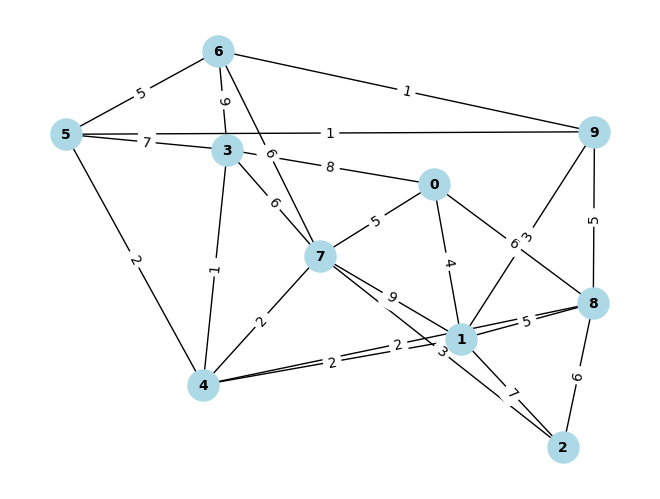

In [3]:
G.draw_graph()

# Building Problem Model

In [4]:
maxcut_prob = MaximumCut(G)
maxcut_qubo = maxcut_prob.qubo

c:\Users\Lenovo\AppData\Local\pypoetry\Cache\virtualenvs\maxcuttest-iYc8dnHX-py3.10\lib\site-packages\networkx\readwrite\json_graph\node_link.py:142: FutureWarning: 
The default value will be `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_data(G, edges="links") to preserve current behavior, or
  nx.node_link_data(G, edges="edges") for forward compatibility.
  warnings.warn(


In [5]:
nx.node_link_data(G, edges="edges")

{'directed': False,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': 0},
  {'id': 1},
  {'id': 2},
  {'id': 3},
  {'id': 4},
  {'id': 5},
  {'id': 6},
  {'id': 7},
  {'id': 8},
  {'id': 9}],
 'edges': [{'weight': 4, 'source': 0, 'target': 1},
  {'weight': 8, 'source': 0, 'target': 3},
  {'weight': 5, 'source': 0, 'target': 7},
  {'weight': 6, 'source': 0, 'target': 8},
  {'weight': 7, 'source': 1, 'target': 2},
  {'weight': 2, 'source': 1, 'target': 4},
  {'weight': 9, 'source': 1, 'target': 7},
  {'weight': 5, 'source': 1, 'target': 8},
  {'weight': 3, 'source': 1, 'target': 9},
  {'weight': 3, 'source': 2, 'target': 7},
  {'weight': 6, 'source': 2, 'target': 8},
  {'weight': 1, 'source': 3, 'target': 4},
  {'weight': 7, 'source': 3, 'target': 5},
  {'weight': 9, 'source': 3, 'target': 6},
  {'weight': 6, 'source': 3, 'target': 7},
  {'weight': 2, 'source': 4, 'target': 5},
  {'weight': 2, 'source': 4, 'target': 7},
  {'weight': 2, 'source': 4, 'target': 8},
  {'weight': 5, 'sour

## Some detail for problem model

In [6]:
maxcut_qubo.hamiltonian.expression

0 + 1.0Z_{3}Z_{4} + 1.0Z_{5}Z_{9} + 1.0Z_{6}Z_{9} + 2.0Z_{1}Z_{4} + 2.0Z_{4}Z_{5} + 2.0Z_{4}Z_{7} + 2.0Z_{4}Z_{8} + 3.0Z_{1}Z_{9} + 3.0Z_{2}Z_{7} + 4.0Z_{0}Z_{1} + 5.0Z_{0}Z_{7} + 5.0Z_{1}Z_{8} + 5.0Z_{5}Z_{6} + 5.0Z_{8}Z_{9} + 6.0Z_{0}Z_{8} + 6.0Z_{2}Z_{8} + 6.0Z_{3}Z_{7} + 6.0Z_{6}Z_{7} + 7.0Z_{1}Z_{2} + 7.0Z_{3}Z_{5} + 8.0Z_{0}Z_{3} + 9.0Z_{1}Z_{7} + 9.0Z_{3}Z_{6}

In [7]:
maxcut_qubo.asdict()

{'terms': [[0, 1],
  [0, 3],
  [0, 7],
  [0, 8],
  [1, 2],
  [1, 4],
  [1, 7],
  [8, 1],
  [1, 9],
  [2, 7],
  [8, 2],
  [3, 4],
  [3, 5],
  [3, 6],
  [3, 7],
  [4, 5],
  [4, 7],
  [8, 4],
  [5, 6],
  [9, 5],
  [6, 7],
  [9, 6],
  [8, 9]],
 'weights': [4.0,
  8.0,
  5.0,
  6.0,
  7.0,
  2.0,
  9.0,
  5.0,
  3.0,
  3.0,
  6.0,
  1.0,
  7.0,
  9.0,
  6.0,
  2.0,
  2.0,
  2.0,
  5.0,
  1.0,
  6.0,
  1.0,
  5.0],
 'constant': 0,
 'n': 10,
 'problem_instance': {'problem_type': 'maximum_cut',
  'G': {'directed': False,
   'multigraph': False,
   'graph': {},
   'nodes': [{'id': 0},
    {'id': 1},
    {'id': 2},
    {'id': 3},
    {'id': 4},
    {'id': 5},
    {'id': 6},
    {'id': 7},
    {'id': 8},
    {'id': 9}],
   'links': [{'weight': 4, 'source': 0, 'target': 1},
    {'weight': 8, 'source': 0, 'target': 3},
    {'weight': 5, 'source': 0, 'target': 7},
    {'weight': 6, 'source': 0, 'target': 8},
    {'weight': 7, 'source': 1, 'target': 2},
    {'weight': 2, 'source': 1, 'target': 4},
  

# Make Solver

there are many various of circuit parametrization

### Standard parametrization


In [107]:
q = QAOA()

### Fourier Parametrization

In [84]:
q = QAOA()

q.set_circuit_properties(p=4, 
                         q=2, 
                         param_type='fourier',
                         init_type='custom',
                         variational_params_dict={
                             "u":[0.1, 0.2], 
                             "v":[0.9, 0.8]}
                         )

### Annealing Parametrization

In [136]:
q = QAOA()

q.set_circuit_properties(p=2, 
                         param_type='annealing', 
                         init_type='ramp')

# Setting Optimizer

### Gradient-based optimizers

In [137]:
# set optimizer and properties
q.set_classical_optimizer(
    method='rmsprop', 
    jac="finite_difference", 
    optimizer_options=dict(
        stepsize=0.001,
        decay=0.9,
        eps=1e-07
    )
)

### Gradient-free optimizers

In [62]:
# set optimizer and properties
q.set_classical_optimizer(
    method='cobyla', 
    maxiter=200,
    optimizer_options=dict(
        rhobeg=0.5,
    )
)

In [78]:
# set optimizer and properties
q.set_classical_optimizer(
    method='nelder-mead',
    maxiter=1000,
    optimizer_options=dict(
        xatol=1e-8,
        fatol=1e-8,
    )
)

### PennyLane optimizers

In [38]:
# set optimizer and properties
q.set_classical_optimizer(
    method='pennylane_nesterov_momentum',     
    jac='finite_difference',
    maxiter=200,
    optimizer_options=dict(
        stepsize=0.015,
        momentum=0.5,
    )
)

# Making Result

In [138]:
q.compile(maxcut_qubo)
q.optimize()

result = q.result

showing result detail

In [139]:
q.result.optimized

{'angles': [0.16076292164, 0.800159715733],
 'cost': -5.301975540052,
 'measurement_outcomes': array([0.00260142+0.01868755j, 0.01758976-0.00132229j,
        0.00834936+0.03366875j, ..., 0.00834936+0.03366875j,
        0.01758976-0.00132229j, 0.00260142+0.01868755j]),
 'job_id': '090576b3-e232-43c0-9860-d1399b48dbf8',
 'eval_number': 102}

(<Figure size 1000x800 with 1 Axes>,
 <Axes: title={'center': 'Cost history'}, xlabel='Number of function evaluations', ylabel='Cost'>)

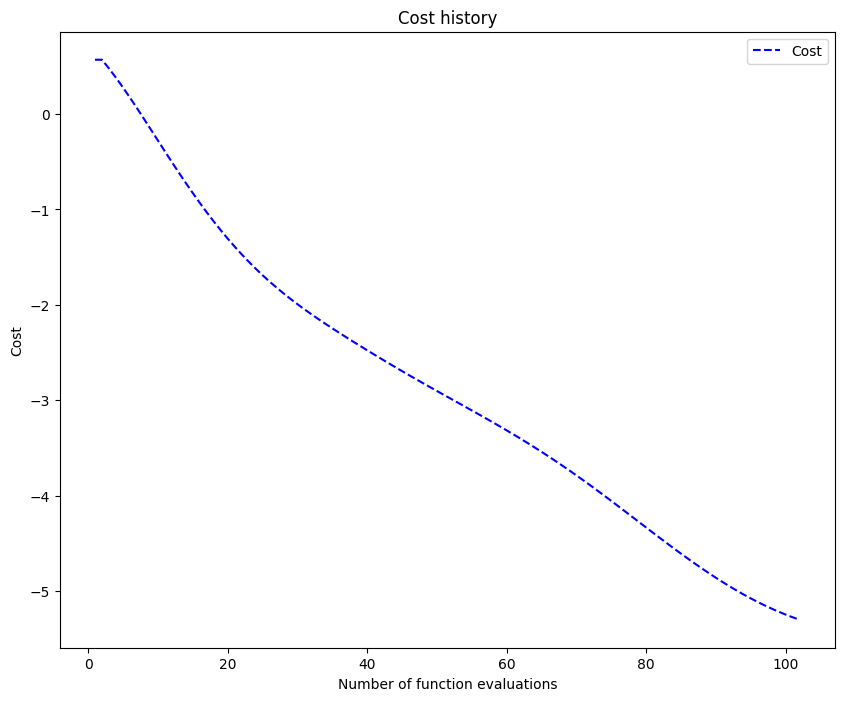

In [140]:
q.result.plot_cost()

In [141]:
print(result.most_probable_states)
bitstring = [int(i) for i in result.most_probable_states['solutions_bitstrings'][0]]

{'solutions_bitstrings': ['0101000110', '1010111001'], 'bitstring_energy': -47.0}


In [142]:
G.evaluate_cut(bitstring, G.edges.data(data=True))

76

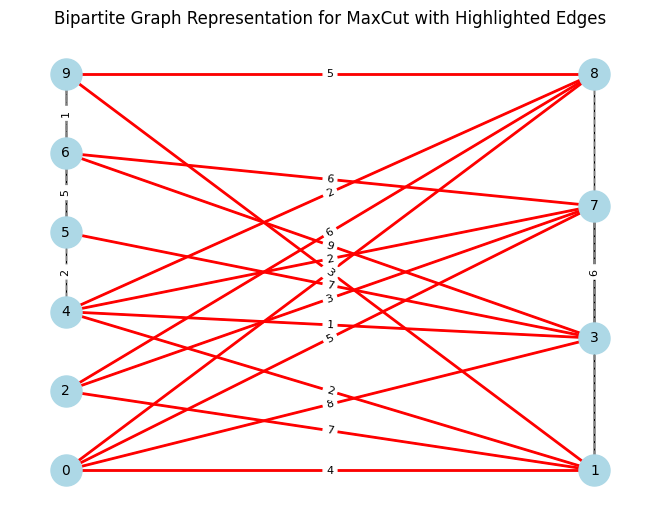

In [143]:
G.draw_partition_graph(bitstring)

### Shot-adaptive optimizers

In [159]:
# create the QAOA object
q = QAOA()

# we need to use a QPU or a shot-based simulator to use shot-adaptive optimizers
q.set_device(create_device('local', 'qiskit.shot_simulator'))
# set the default number of shots
q.set_backend_properties(n_shots=100000)

# set optimizer and properties
q.set_classical_optimizer(
    method='cans', 
    jac="param_shift", 
    maxiter=100,
    optimizer_options=dict(
        stepsize=0.001,
        mu=0.95,
        b=0.001,        
        n_shots_min=10,
        n_shots_max=100,
        n_shots_budget=50000,
    )
)

# compile and optimize using the chosen optimizer
q.compile(maxcut_qubo)
q.optimize()

result = q.result

(<Figure size 1000x800 with 1 Axes>,
 <Axes: title={'center': 'Evolution of number of shots for gradient estimation'}, xlabel='Iterations', ylabel='Number of shots'>)

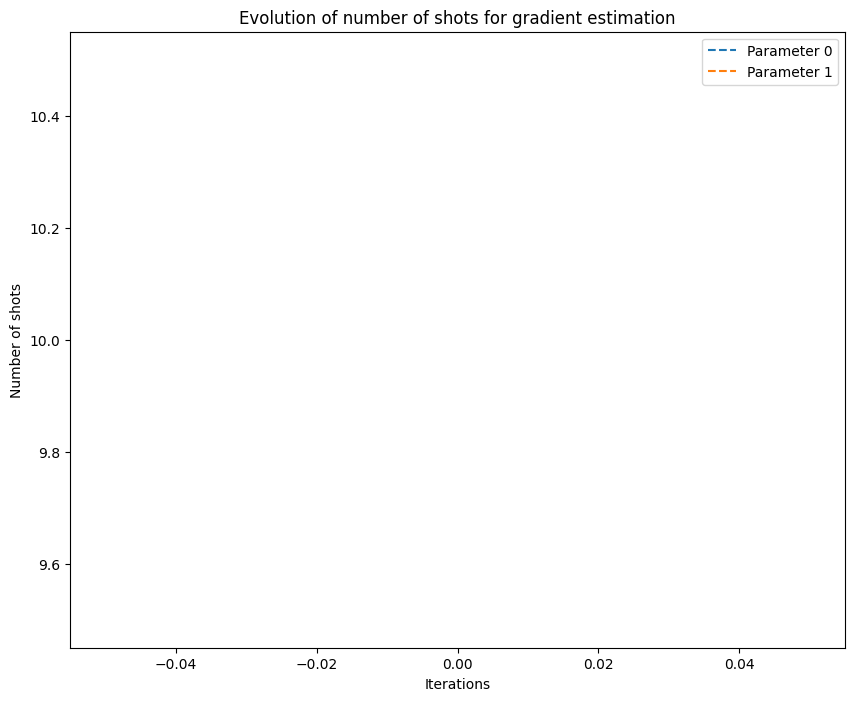

In [160]:
result.plot_n_shots()

In [161]:
print(result.most_probable_states)
bitstring = [int(i) for i in result.most_probable_states['solutions_bitstrings'][0]]

{'solutions_bitstrings': ['0111101001'], 'bitstring_energy': -37.0}


In [162]:
G.evaluate_cut(bitstring, G.edges.data(data=True))

71